In [1]:
import math
import random
import re

from jmetal.core.problem import PermutationProblem
from jmetal.core.solution import PermutationSolution

class VRP(PermutationProblem):
    

    def __init__(self, instance: str = None):
        super(VRP, self).__init__()

        distance_matrix, demand, number_of_cities, max_no_of_vehicle ,vehicle_capacity= self.__read_from_file(instance)

        self.distance_matrix = distance_matrix
        self.demand = demand
        self.max_no_of_vehicle = max_no_of_vehicle
        self.vehicle_capacity=vehicle_capacity
        self.number_of_objectives = 2
        self.obj_directions = [self.MINIMIZE,self.MINIMIZE]
        self.number_of_variables = number_of_cities
        self.obj_labels = ['no of vehicles', 'distance']
        self.number_of_constraints = 0

    def __read_from_file(self, filename: str):
        file=open(filename) 
        xcoordinate=[]
        ycoordinate=[]
        demand=[]
        while True:
            try:
                line=file.readline().split()
                if(line!=[]):
                    if((len(line)==2)&(line[0].isdigit())):
                        max_no_of_vehicle=int(line[0])              
                        vehicle_capacity=int(line[1])
                
                    elif((len(line)>=2)&(line[0].isdigit())):
                        xcoordinate.append(int(line[1]))
                        ycoordinate.append(int(line[2]))
                        demand.append(int(line[3]))
                if((xcoordinate!=[])&(len(line)==0)):
                            break
            except EOFError:
                pass
        file.close()
        #print(max_no_of_vehicle)
        #print(vehicle_capacity)
        #print(xcoordinate)
       # print(ycoordinate)
        #print(demand)
        dimension=len(demand)-1
       # print (dimension)
        matrix = [[-1] * (dimension+1) for _ in range(dimension+1)]
        for k in range(dimension+1):
            for j in range(dimension+1):
                dist = math.sqrt((xcoordinate[k]-xcoordinate[j]) ** 2 + (ycoordinate[k]-ycoordinate[j]) ** 2)
                dist = round(dist)
                matrix[k][j] = dist
        
        #print(matrix)

        return matrix,demand, dimension , max_no_of_vehicle,vehicle_capacity

    def evaluate(self, solution: PermutationSolution) -> PermutationSolution:
        fitness = 0
        nov=1
        perm=solution.variables
        crm=[0]
        cap=0
        dem=self.demand
        capacity=self.vehicle_capacity
        for i in perm:
            s=cap+dem[i+1]
            if(s <=capacity):
                crm.append(i+1)
                cap =s
            else:
                crm.append(0)
                nov+=1
                cap=0
                crm.append(i+1)
        crm.append(0)
        for i in range(len(crm)-1):
            x = crm[i]
            y = crm[i + 1]
            fitness += self.distance_matrix[x][y]
        solution.objectives[0] = nov
        solution.objectives[1] =fitness
        return solution
    def get_route(self, solution: PermutationSolution) -> PermutationSolution:
        perm=solution.variables
        crm=[0]
        cap=0
        j=0
        dem=self.demand
        capacity=self.vehicle_capacity
        for i in perm:
            s=cap+dem[i+1]
            if(s <=capacity):
                crm.append(i+1)
                cap =s
            else:
                crm.append(0)
                
                cap=0
                crm.append(i+1)
        crm.append(0)
        for i in range(len(crm)-1):
            if(crm[i]==0):
                j=j+1
                print("route ",j,"->","Depot", end=' ')
                
            else:
                print("city",crm[i], end=' ')
                if(crm[i+1]==0):
                    print("Depot")
        return  
         

    def create_solution(self) -> PermutationSolution:
        new_solution = PermutationSolution(number_of_variables=self.number_of_variables,number_of_objectives=self.number_of_objectives)
        new_solution.variables = random.sample(range(self.number_of_variables), k=self.number_of_variables)
        #print(new_solution.variables)
        return new_solution


    def number_of_cities(self):
        return self.number_of_variables

    def get_name(self):
        return 'VRP'

In [ ]:
from jmetal.algorithm.multiobjective.spea2 import SPEA2
from jmetal.operator.crossover import PMXCrossover
from jmetal.operator.mutation import PermutationSwapMutation
from jmetal.util.termination_criterion import StoppingByEvaluations

problem = VRP('./Input_Data.txt')
max_evaluations = 2000
algorithm = SPEA2(problem=problem,population_size=50,
                   offspring_population_size=50,
                   mutation=PermutationSwapMutation(0.1),
                   crossover=PMXCrossover(0.9),
                   termination_criterion=StoppingByEvaluations(max_evaluations)
)
algorithm.run()
solutions = algorithm.get_result()

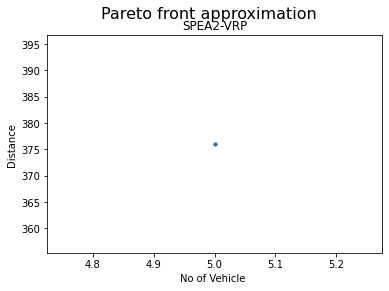

In [9]:
from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions

front = get_non_dominated_solutions(solutions)

plot_front = Plot('Pareto front approximation', axis_labels=['No of Vehicle ', 'Distance'])
plot_front.plot(front, label='SPEA2-VRP')

In [10]:
for i in range(len(front)):
    print("Solution" ,i+1,"no of vehicle=",front[i].objectives[0],"distance=",front[i].objectives[1])  
    problem.get_route(front[i])

Solution 1 no of vehicle= 5 distance= 376
route  1 -> Depot city 5 city 3 city 2 city 1 city 23 Depot
route  2 -> Depot city 21 city 24 city 25 city 22 Depot
route  3 -> Depot city 15 city 19 city 12 city 7 Depot
route  4 -> Depot city 13 city 17 city 11 city 9 city 6 city 20 Depot
route  5 -> Depot city 16 city 14 city 18 city 8 city 4 city 10 Depot
